In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os 

from utils.clustering_utils import get_colors

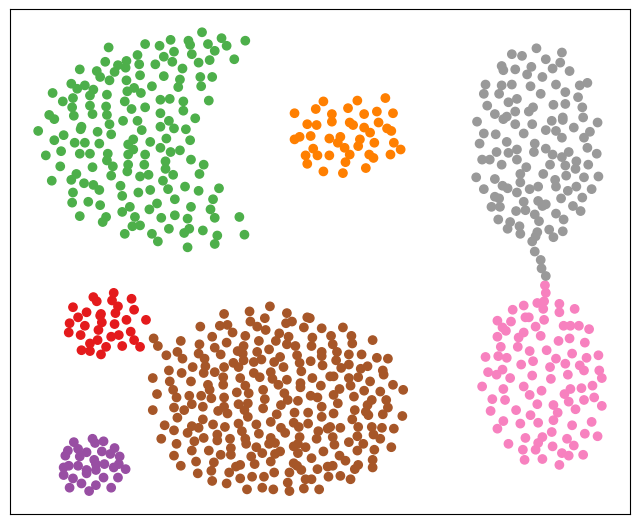

In [5]:
dataset = pd.read_csv('./data/dataset.csv')

x = dataset['x']
y = dataset['y']
labels = dataset['label']
aspect_ratio = (max(x) - min(x)) / (max(y) - min(y))

plt.figure(figsize=(8, 8 / aspect_ratio))
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.scatter(x, y, color=get_colors(labels))

plt.savefig('./data/dataset.pdf', format='pdf')

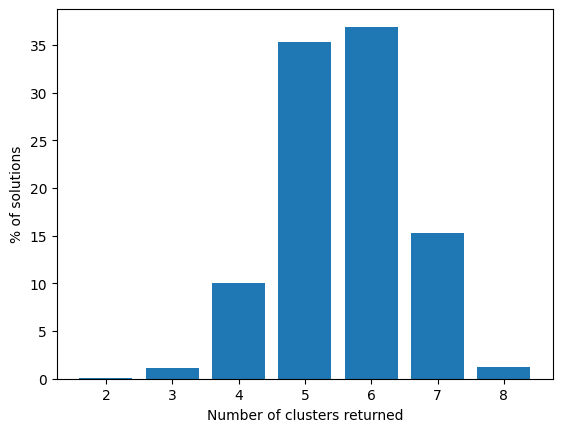

In [32]:
import json 

counts = {}
by_num = {}
with open('./fresnel/raw_results.json') as fp:
  occ = json.load(fp)
  counts = next(iter(occ.values()))['counter']

  for bitstring, count in counts.items():
    ones = bitstring.count('1')
    if ones in by_num:
      by_num[ones] += count 
    else:
      by_num[ones] = count 

norm_occ = list(map(lambda x: 100 * x / sum(by_num.values()), by_num.values()))

plt.figure()
plt.bar(by_num.keys(), norm_occ)
plt.xlabel('Number of clusters returned')
plt.ylabel('% of solutions')
plt.savefig('./fresnel/num_clusters.pdf', format='pdf')
  

In [41]:
{key: 100*value / sum(by_num.values()) for key, value in by_num.items()}

{7: 15.308641975308642,
 6: 36.91358024691358,
 5: 35.30864197530864,
 4: 10.0,
 3: 1.1111111111111112,
 8: 1.2345679012345678,
 2: 0.12345679012345678}